I. CHUẨN BỊ VÀ LÀM SẠCH DỮ LIỆU

In [ ]:
#Nhập thư viện và dữ liệu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#Đọc file dữ liệu
df = pd.read_csv('marketing_AB.csv')

In [ ]:
#Inspect data
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [83]:
#Bỏ cột số thứ tự do không cần thiết
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

In [84]:
#Inspect lại 5 dòng đầu
display(df.head(5))
#Inspect thông tin bộ dữ liệu
df.info()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


<class 'pandas.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   user id        588101 non-null  int64
 1   test group     588101 non-null  str  
 2   converted      588101 non-null  bool 
 3   total ads      588101 non-null  int64
 4   most ads day   588101 non-null  str  
 5   most ads hour  588101 non-null  int64
dtypes: bool(1), int64(3), str(2)
memory usage: 23.0 MB


In [85]:
#Kiểm tra giá trị thiếu (Missing Values)
df.isnull().sum()
#Output: Không có giá trị thiếu, bộ dữ liệu sạch

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [86]:
#Kiểm tra liệu có duplicates không
df['user id'].duplicated().sum()
#Output: Không có duplicate nào

np.int64(0)

In [87]:
#Kiểm tra các nhóm 'ad' và nhóm 'psa' có trùng quan sát không
user_groups = df.groupby('user id')['test group'].nunique()
users_in_both = user_groups[user_groups > 1].count()
print(f"Số lượng user nằm ở cả 2 nhóm: {users_in_both}")

Số lượng user nằm ở cả 2 nhóm: 0


In [101]:
#Kiểm tra sự cân bằng của các nhóm
group_counts = df['test group'].value_counts()
group_pct = df['test group'].value_counts(normalize=True) * 100
print("\nSố lượng người ở mỗi nhóm:")
print(group_counts)
print("\nTỷ lệ phần trăm giữa các nhóm:")
print(group_pct)


Số lượng người ở mỗi nhóm:
test group
ad     564577
psa     23524
Name: count, dtype: int64

Tỷ lệ phần trăm giữa các nhóm:
test group
ad     96.000007
psa     3.999993
Name: proportion, dtype: float64


In [89]:
#Kiểm tra outliers
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

II. PHÂN TÍCH KHÁM PHÁ EDA

In [107]:
#Tính toán tỷ lệ chuyển đổi (conversion rate)
df_conversion = df.groupby('test group')['converted'].mean().reset_index()
df_conversion['converted_pct'] = df_conversion['converted']*100
print(f'Tỷ lệ chuyển đổi thô của mỗi nhóm:')
print(df_conversion)

Tỷ lệ chuyển đổi thô của mỗi nhóm:
  test group  converted  converted_pct
0         ad   0.025547       2.554656
1        psa   0.017854       1.785411


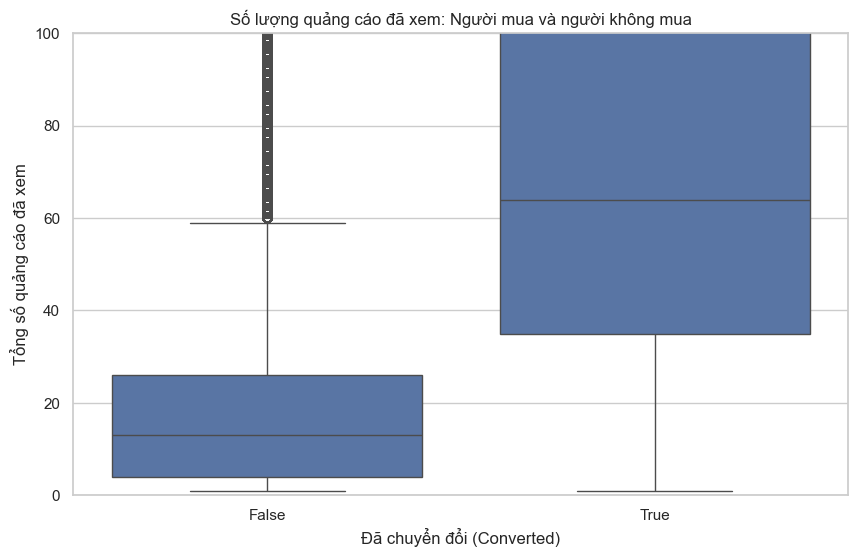

In [110]:
#So sánh số lượng quảng cáo đã xem giữa người mua và người không mua
plt.figure(figsize=(10, 6))
sns.boxplot(x='converted', y='total ads', data=df)
plt.title('Số lượng quảng cáo đã xem: Người mua và người không mua')
plt.xlabel('Đã chuyển đổi (Converted)')
plt.ylabel('Tổng số quảng cáo đã xem')

# Vì có một số người xem quá nhiều (outliers), nên giới hạn trục Y để dễ nhìn hơn
plt.ylim(0, 100) 
plt.show()

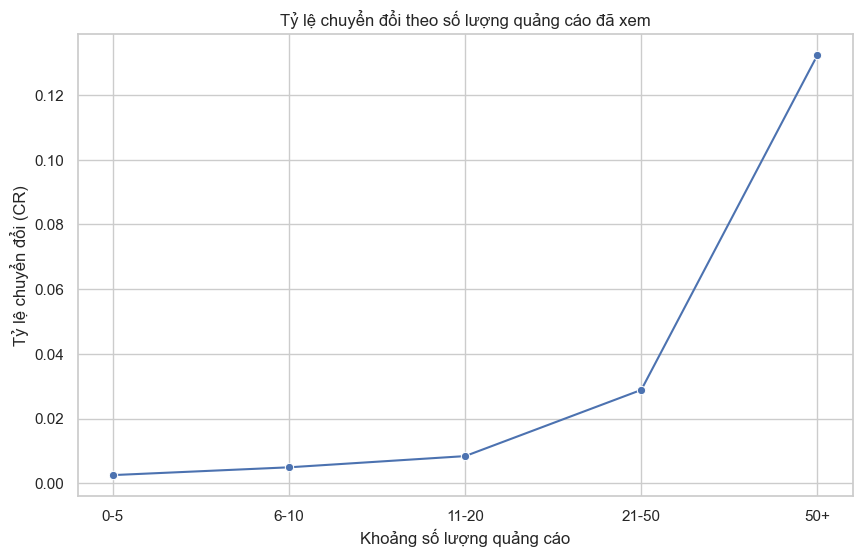

In [ ]:
#Phân tích tỷ lệ chuyển đổi theo tần suất
#Chia số lượng quảng cáo thành các nhóm (0-5, 5-10, 10-20, 20-50, 50+)
bins = [0, 5, 10, 20, 50, df['total ads'].max()]
labels = ['0-5', '6-10', '11-20', '21-50', '50+']
df['ad_range'] = pd.cut(df['total ads'], bins=bins, labels=labels)

#Tính tỷ lệ chuyển đổi cho mỗi nhóm
range_conversion = df.groupby('ad_range')['converted'].mean().reset_index()

#Vẽ biểu đồ đường để thấy xu hướng
plt.figure(figsize=(10, 6))
sns.lineplot(x='ad_range', y='converted', data=range_conversion, marker='o', sort=False)
plt.title('Tỷ lệ chuyển đổi theo số lượng quảng cáo đã xem')
plt.xlabel('Khoảng số lượng quảng cáo')
plt.ylabel('Tỷ lệ chuyển đổi (CR)')
plt.grid(True)
plt.show()

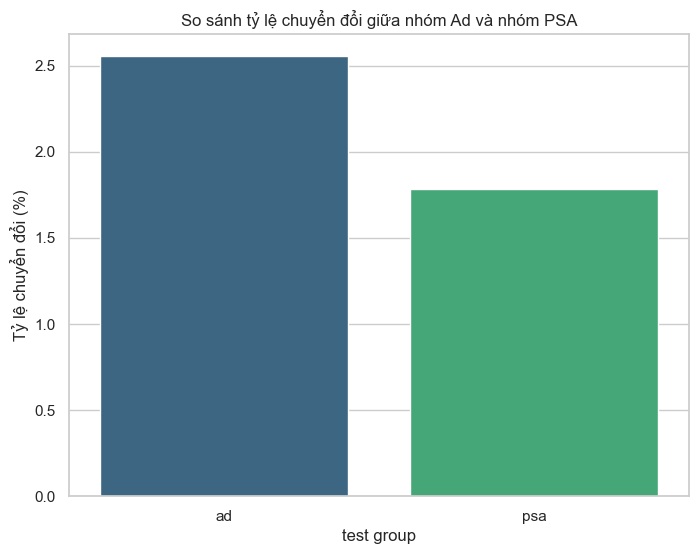

In [111]:
#Vẽ biểu đồ so sánh CR giữa hai nhóm
plt.figure(figsize=(8, 6))
sns.barplot(x='test group', y='converted_pct', hue= 'test group', data=df_conversion, palette='viridis')
plt.title('So sánh tỷ lệ chuyển đổi giữa nhóm Ad và nhóm PSA')
plt.ylabel('Tỷ lệ chuyển đổi (%)')
plt.show()

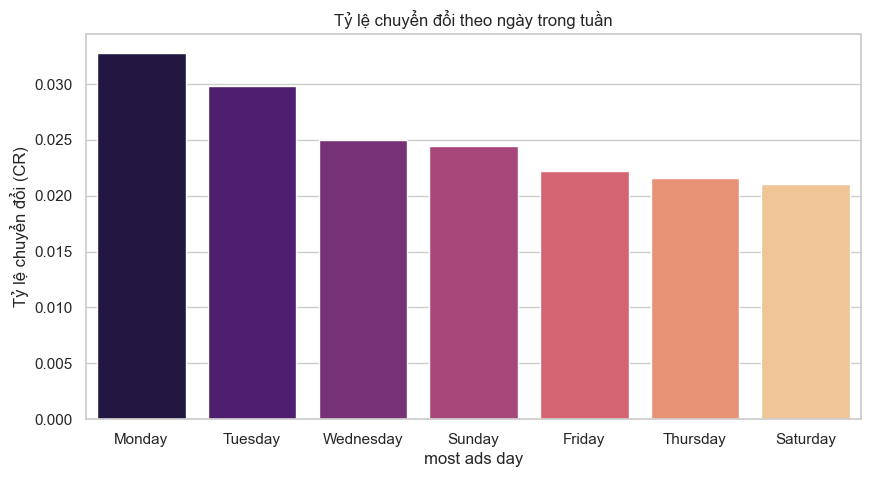

In [112]:
#Tỷ lệ chuyển đổi theo ngày trong tuần
day_conversion = df.groupby('most ads day')['converted'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='most ads day', y='converted', hue='most ads day', data=day_conversion, palette='magma')
plt.title('Tỷ lệ chuyển đổi theo ngày trong tuần')
plt.ylabel('Tỷ lệ chuyển đổi (CR)')
plt.show()

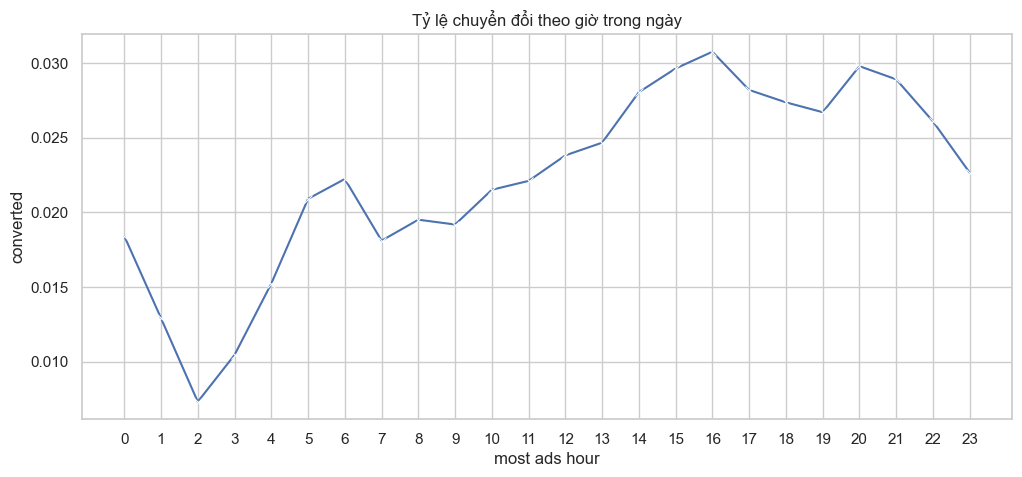

In [93]:
#Tỷ lệ chuyển đổi theo giờ trong ngày
hour_conversion = df.groupby('most ads hour')['converted'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(x='most ads hour', y='converted', data=hour_conversion, marker='x')
plt.title('Tỷ lệ chuyển đổi theo giờ trong ngày')
plt.xticks(range(0, 24))
plt.show()

In [94]:
#Tạo bảng tần suất(contingency table)
contingency_table = pd.crosstab(df['test group'], df['converted'])
print(contingency_table)

converted    False  True 
test group               
ad          550154  14423
psa          23104    420


In [95]:
#Thực hiện kiểm định Chi-Square
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nGiá trị Chi-square: {chi2:.4f}")
print(f"P-value: {p_value:.10f}")


Giá trị Chi-square: 54.0058
P-value: 0.0000000000


In [104]:
#Kết luận
alpha = 0.05
if p_value < alpha:
    print('\nKẾT LUẬN: P-value < 0.05. Bác bỏ giả thuyết H')
    print('Sự khác biệt có ý nghĩa thống kê. Quảng cáo thực sự có hiệu quả.')
else:
    print('\nKẾT LUẬN: P-value >= 0.05. Chưa đủ bằng chứng bác bỏ H')
    print('Sự khác biệt có thể chỉ là ngẫu nhiên. Quảng cáo không hiệu quả rõ rệt.')


KẾT LUẬN: P-value < 0.05. Bác bỏ giả thuyết H
Sự khác biệt có ý nghĩa thống kê. Quảng cáo thực sự có hiệu quả.


III. ĐÁNH GIÁ HIỆU QUẢ (LIFT ANALYSIS)

In [97]:
#Tính toán Lift
cr_ad = df[df['test group']=='ad']['converted'].mean()
cr_psa = df[df['test group']=='psa']['converted'].mean()

lift = (cr_ad-cr_psa)/cr_psa*100
print(f'Quảng cáo giúp tăng tỷ lệ chuyển đổi thêm: {lift:.2f}%')

Quảng cáo giúp tăng tỷ lệ chuyển đổi thêm: 43.09%
